In [3]:
# Proprietary library
import aux_document_retrieval_bm25 as aux_bm25
import aux_document_retrieval_vsm as aux_vsm
import aux_semantic_search as aux_semantics
import aux_retrieval_evaluation as aux_retrieval
import aux_document_retrieval_hybrid as aux_hybrid
from dataclass import QueryResult

from typing import  Dict, Any, Union
import dataclass as data
import pandas as pd
from pathlib import Path
import logging
import nltk
import json
import importlib
import pickle
import matplotlib.pyplot as plt

# Reload Modules
importlib.reload(aux_vsm)
importlib.reload(aux_bm25)
importlib.reload(aux_semantics)
importlib.reload(aux_retrieval)

# For word processing
nltk.download('punkt_tab')

DocLike = Union[data.RetrievedDocument, Dict[str, Any]]

2025-06-05 12:06:24,057 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
[nltk_data] Downloading package punkt_tab to /home/pablo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
paths = {
    'word2vec': Path("../02-data/03-VSM/01-Word2Vec/word2vec-google-news-300.bin"),
    'idf_cache': Path("../02-data/03-VSM/idf_cache_path.pkl"),
    'word2vec_vsm_multivector': Path("../02-data/03-VSM/01-Word2Vec/word2vec-4-50-4-150-1.pkl"),
    'word2vec_vsm_singlevector': Path("../02-data/03-VSM/01-Word2Vec/word2vec-4-50-4-150-0.pkl"),
    'file': Path("../02-data/00-testing/batteries-non-rechargable-primary/1cr2/1cr2.txt"),
    'output_path': Path("../02-data/00-testing/batteries-non-rechargable-primary/1cr2/sentence_expansions.txt"),
    'pdf_folder': Path("../02-data/00-testing/"),
    'retriever': Path("../02-data/05-Retrieval/corpus_bm25"),
    'queries_1' : Path("../02-data/06-Evaluation/query_evaluation_1.json"),
    'queries_2' : Path("../02-data/06-Evaluation/query_evaluation_2.json"),
    'ranking_query_evaluation_1' : Path('../02-data/06-Evaluation/ranking_query_evaluation_1.pkl'), ## using queries_1, singlevector, QE, minmax
    'ranking_query_evaluation_2' : Path('../02-data/06-Evaluation/ranking_query_evaluation_2.pkl'), ## using queries_2
    'ranking_query_evaluation_3' : Path('../02-data/06-Evaluation/ranking_query_evaluation_3.pkl'), ## using queries_1, multivector, QE, minmax
    'ranking_query_evaluation_4' : Path('../02-data/06-Evaluation/ranking_query_evaluation_4.pkl'), ## using queries_1, multivector, no QE, minmax
    'ranking_query_evaluation_5' : Path('../02-data/06-Evaluation/ranking_query_evaluation_5.pkl'), ## using queries_1, multivector, QE, zscore
    'ranking_query_evaluation_6' : Path('../02-data/06-Evaluation/ranking_query_evaluation_6.pkl'), ## using queries_1, multivector, QE, minmax/zscore
    'QE_eval' : Path("../02-data/06-Evaluation/QE_eval.pkl"),           ## query1 , multivector , minmax/zscore , QE
    'no_QE_eval' : Path("../02-data/06-Evaluation/QE_eval.pkl")         ## query1 , multivector , minmax/zscore , no QE

}


# 1) LOAD ALL DATAFRAMES FROM DISK
# --------------------------------
# This file should contain a dict with keys:
#   'hybrid_statistics', 'rrf_statistics', 'bm25_data', 'vsm_statistics', 'rerank_statistics'
# Each value is a pandas.DataFrame with columns:
#   ['doc','label','rank','score','label_count_top_5','label_count_top_10','label_count_top_20']

with open(str(paths["QE_eval"]), 'rb') as f:
    dfs = pickle.load(f)

hybrid_df = dfs['hybrid_statistics']
rrf_df    = dfs['rrf_statistics']
bm25_df   = dfs['bm25_data']
vsm_df    = dfs['vsm_statistics']
rerank_df = dfs['rerank_statistics']

df_list = [
    ('Hybrid', hybrid_df),
    ('RRF',    rrf_df),
    ('BM25',   bm25_df),
    ('VSM',    vsm_df),
    ('ReRank', rerank_df)
]


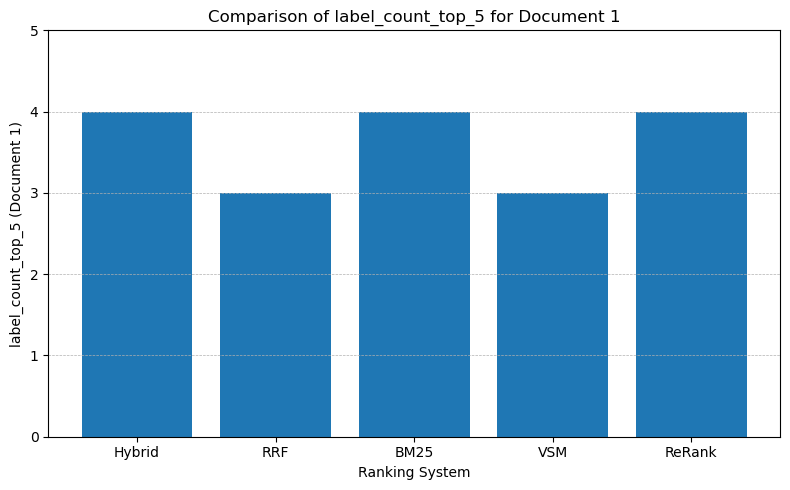

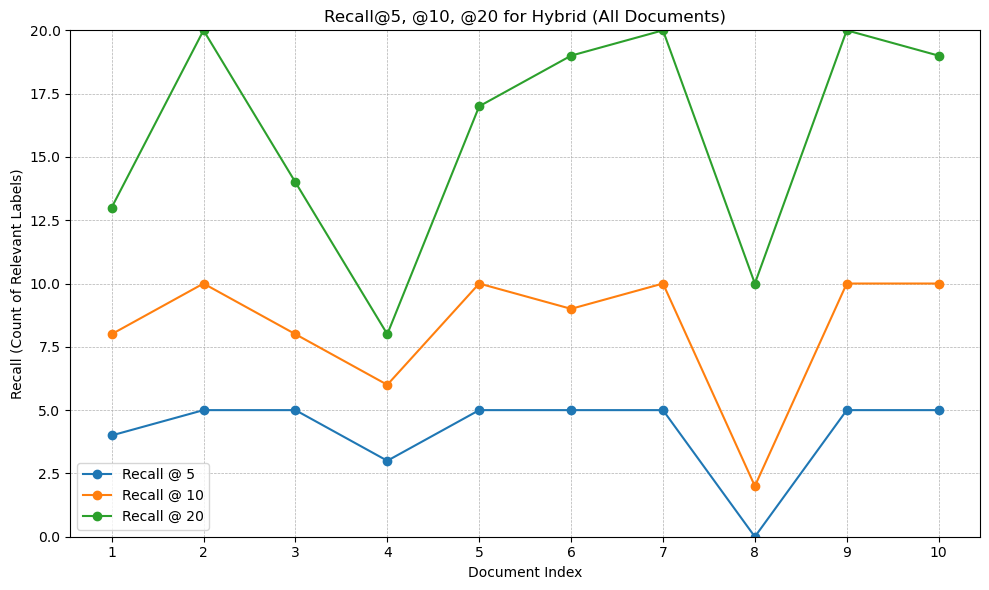

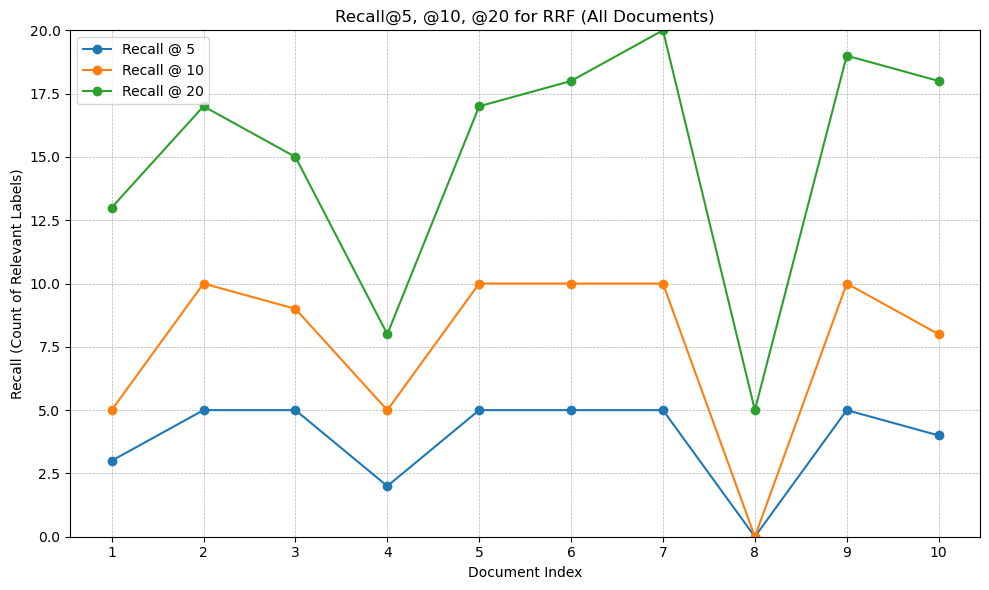

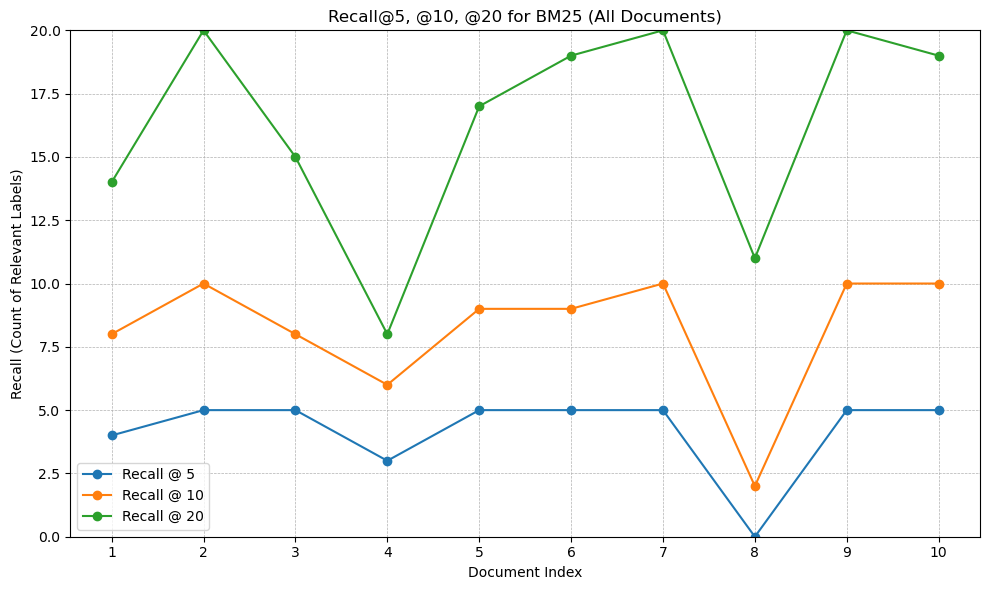

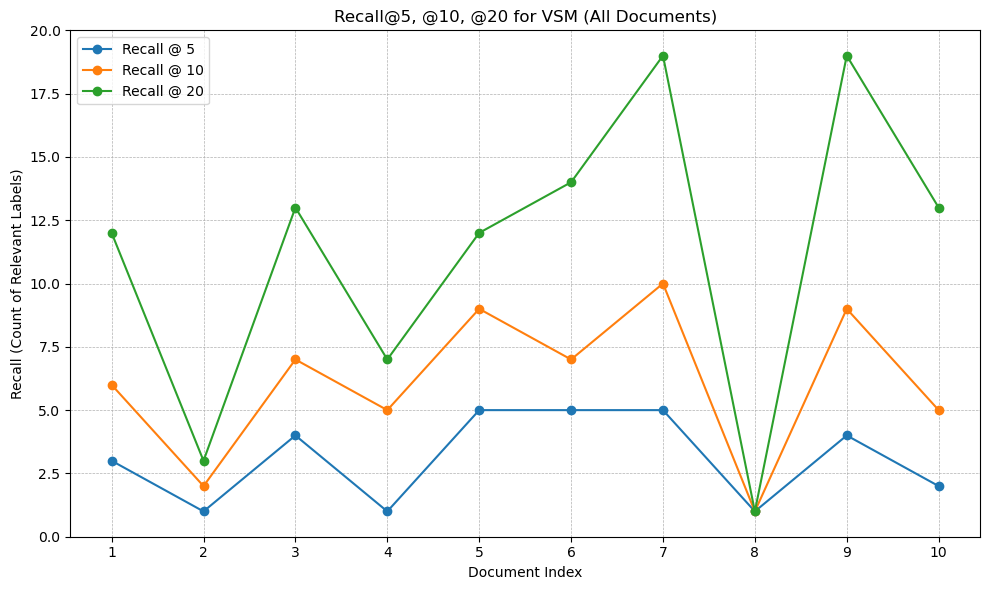

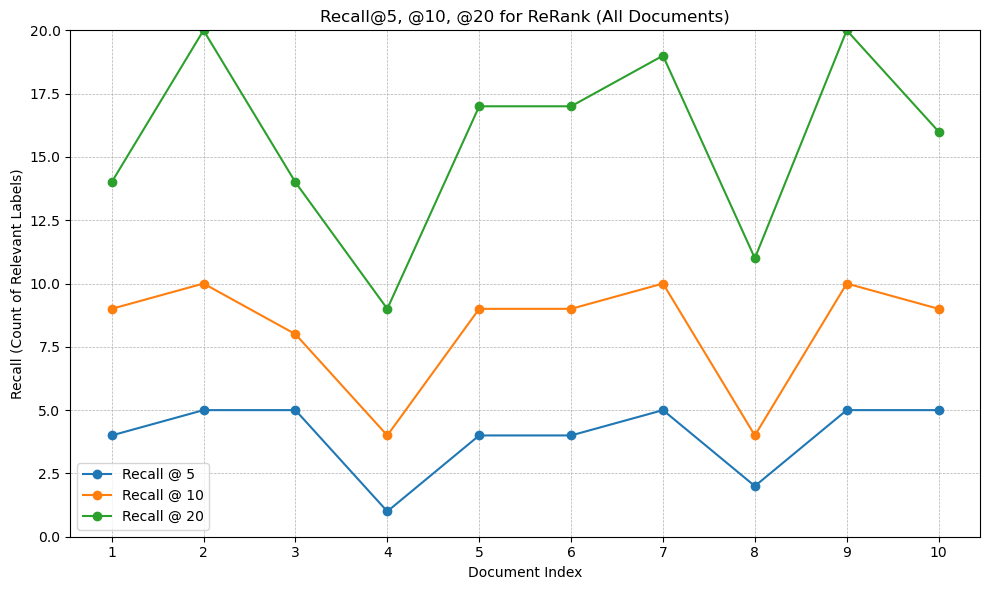

In [10]:
import pickle
import matplotlib.pyplot as plt


# 2) PLOT label_count_top_5 FOR DOCUMENT 1 ACROSS RANKING SYSTEMS
# --------------------------------------------------------------
# We treat “Document 1” as row index 0 in each DataFrame.
doc_index = 0
names     = []
top5_vals = []

for name, df in df_list:
    # extract label_count_top_5 for the first row (index=0)
    val = df.iloc[doc_index]['label_count_top_5']
    names.append(name)
    top5_vals.append(val)

plt.figure(figsize=(8, 5))
plt.bar(names, top5_vals)
plt.xlabel('Ranking System')
plt.ylabel('label_count_top_5 (Document 1)')
plt.title('Comparison of label_count_top_5 for Document 1')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# 4) EXAMPLE USAGE: CALL THE FUNCTION FOR EACH RANKING SYSTEM
# -----------------------------------------------------------
aux_retrieval.plot_recall_for_documents(hybrid_df, 'Hybrid')
aux_retrieval.plot_recall_for_documents(rrf_df, 'RRF')
aux_retrieval.plot_recall_for_documents(bm25_df, 'BM25')
aux_retrieval.plot_recall_for_documents(vsm_df, 'VSM')
aux_retrieval.plot_recall_for_documents(rerank_df, 'ReRank')


In [1]:
# 4) EXAMPLE USAGE:
#    This will plot the "recall@5" (label_count_top_5) lines for all five methods together.
aux_retrieval.plot_combined_recall(df_list, 'label_count_top_5')

# If you want to compare recall@10 for all methods, call:
aux_retrieval.plot_combined_recall(df_list, 'label_count_top_10')

# Or for recall@20:
aux_retrieval.plot_combined_recall(df_list, 'label_count_top_20')

NameError: name 'aux_retrieval' is not defined

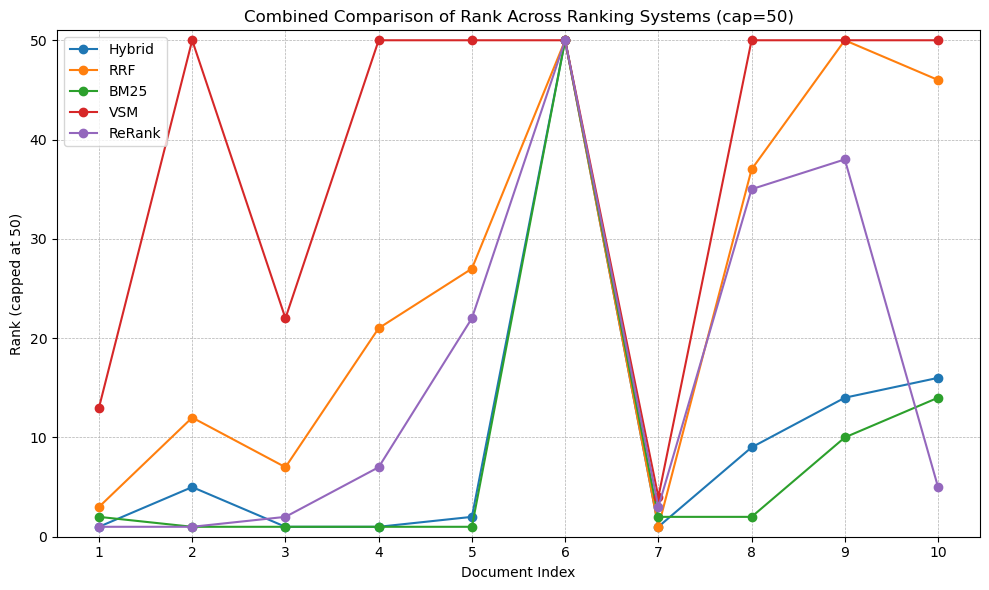

In [18]:
aux_retrieval.plot_combined_rank(df_list)

In [36]:
importlib.reload(aux_retrieval)

<module 'aux_retrieval_evaluation' from '/media/pablo/windows_files/00 - Master/05 - Research&Thesis/R2-Research_Internship_2/01-code/aux_retrieval_evaluation.py'>

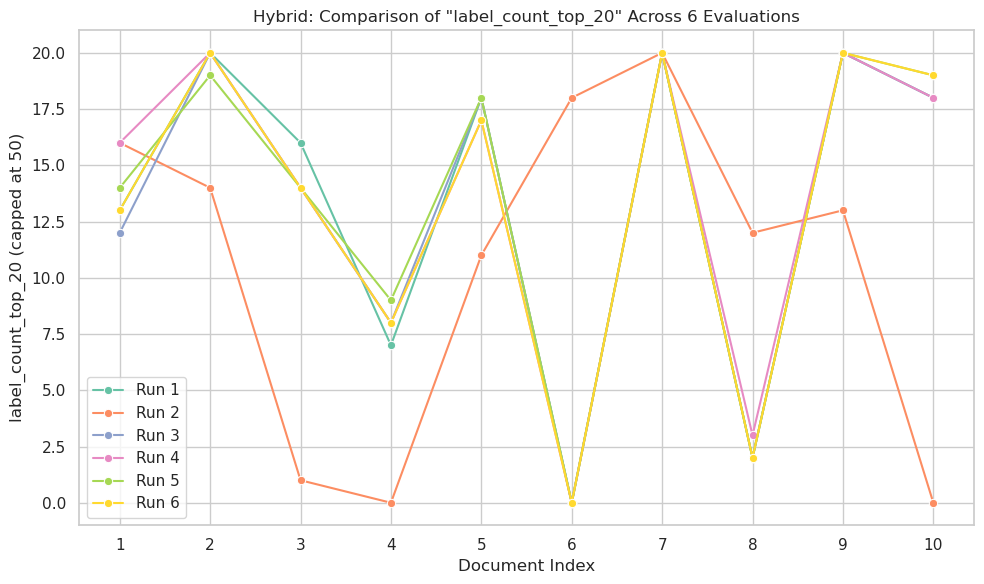

In [37]:
 rqe_list = aux_retrieval.load_rqe_runs(1, 6)
 labels = [f'Run {i}' for i in range(1, 7)]
 
aux_retrieval.plot_hybrid_across_evaluations_sns(
    rqe_list,
    metric_col='label_count_top_20',
    labels=labels,
    cap=50
)